In [49]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('../data_sets/baby.csv')

In [51]:
smoking_and_weight = df[['Maternal Smoker', 'Birth Weight']]
smoking_and_weight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [52]:
smoker = smoking_and_weight['Birth Weight'][smoking_and_weight['Maternal Smoker'] == True]
non_smoker = smoking_and_weight['Birth Weight'][smoking_and_weight['Maternal Smoker'] == False]

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

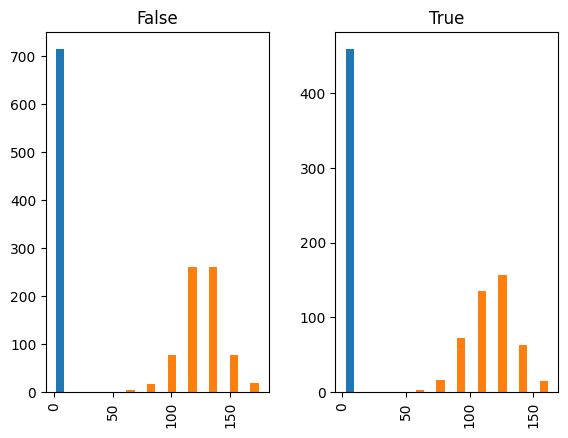

In [53]:
smoking_and_weight.hist(by='Maternal Smoker')

In [54]:
import seaborn as sb

<AxesSubplot: >

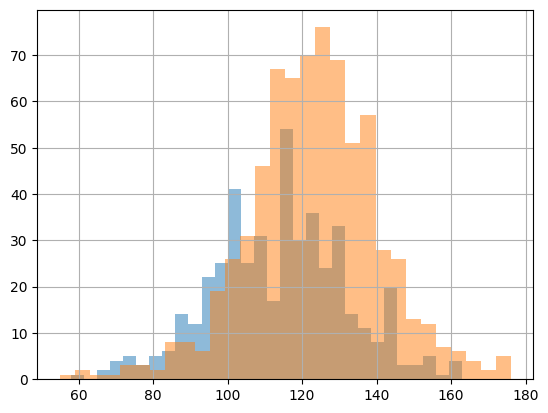

In [55]:
smoker.hist(alpha=0.5, bins=30)
non_smoker.hist(alpha = 0.5,bins=30)

Distribution of weight of babies born to mothers who smoked appears slightly left shifted to that of non smokers

Using random permutation to determine if difference is due to chance

In [56]:
random_samples = smoking_and_weight.sample(1174, replace=False, random_state=590)
random_weights = random_samples['Birth Weight']

org_shuffled = smoking_and_weight.assign(shuffled_weights=random_weights.values)
org_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,117
1,False,113,98
2,True,128,114
3,True,108,101
4,False,136,123
...,...,...,...
1169,False,113,130
1170,False,128,110
1171,True,130,96
1172,False,125,137


Now each mother's baby weight is randomly assigned. If the originally observed difference was due to chance, the difference now must be the same.

In [57]:
all_group_mean = org_shuffled.groupby('Maternal Smoker').mean()
all_group_mean

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.053147
True,113.819172,120.100218


In [58]:
diff_smoker_and_non_smoker = all_group_mean['shuffled_weights'][0] - all_group_mean['shuffled_weights'][1]
diff_smoker_and_non_smoker

-1.047071011776893

In [59]:
# Get the original difference.
org_group_mean = df.groupby('Maternal Smoker').mean()
org_group_mean

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
Maternal Smoker,,,,,
False,123.085315,279.874126,27.544056,64.013986,129.47972
True,113.819172,277.897603,26.736383,64.104575,126.91939


In [60]:
diff_org = org_group_mean['Birth Weight'][0] - org_group_mean['Birth Weight'][1]
diff_org

9.266142572024918